## Load and Explore Dataset

In [2]:
# Launch magic commands to automatically reloads modules
%load_ext autoreload
%autoreload 2

In [3]:
# import necessary packages

import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../data/raw/beer_reviews.csv')

In [5]:
# check the head of the dataframe
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
# check the shape of the dataframe
df.shape

(1586614, 13)

In [7]:
# display summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [8]:
# descriptive statistics of df
df.describe().round()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1586614.0,1.586614e+06,1586614.0,1586614.0,1586614.0,1586614.0,1586614.0,1518829.0,1586614.0
mean,3130.0,1.224089e+09,4.0,4.0,4.0,4.0,4.0,7.0,21713.0
std,5578.0,7.654428e+07,1.0,1.0,1.0,1.0,1.0,2.0,21818.0
min,1.0,8.406720e+08,0.0,1.0,0.0,1.0,1.0,0.0,3.0
25%,143.0,1.173224e+09,4.0,4.0,4.0,4.0,4.0,5.0,1717.0
50%,429.0,1.239203e+09,4.0,4.0,4.0,4.0,4.0,6.0,13906.0
75%,2372.0,1.288568e+09,4.0,4.0,4.0,4.0,4.0,8.0,39441.0
max,28003.0,1.326285e+09,5.0,5.0,5.0,5.0,5.0,58.0,77317.0


In [9]:
# describe all non numeric dtypes column
df.describe(exclude=['float64','int64'])

,brewery_name,review_profilename,beer_style,beer_name
count,1586599,1586266,1586614,1586614
unique,5742,33387,104,56857
top,Boston Beer Company (Samuel Adams),northyorksammy,American IPA,90 Minute IPA
freq,39444,5817,117586,3290


In [10]:
# check unique values in review_time to prove that it is highly unique
df['review_time'].nunique()

1577960

In [11]:
# proving that brewery_name and review_profilename is not synonymous. It has distinc relationship amonts its value
df[['brewery_name','review_profilename']]

,brewery_name,review_profilename
0,Vecchio Birraio,stcules
1,Vecchio Birraio,stcules
2,Vecchio Birraio,stcules
3,Vecchio Birraio,stcules
4,Caldera Brewing Company,johnmichaelsen
...,...,...
1586609,The Defiant Brewing Company,maddogruss
1586610,The Defiant Brewing Company,yelterdow
1586611,The Defiant Brewing Company,TongoRad
1586612,The Defiant Brewing Company,dherling


In [12]:
# Check if the datasets contain any null values
print(df.isnull().sum())

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


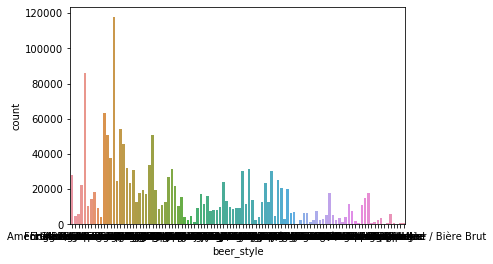

In [13]:
# check beer_style distribution

import seaborn as sns

sns.countplot(x = 'beer_style', data=df)


## Prepare Data

In [27]:
# make a copy of the dataset to clean
df_cleaned = df.copy() 

In [28]:
# we don't need unique ids
df_cleaned.drop(['brewery_id','review_time','beer_beerid','review_profilename'], axis=1, inplace=True)

In [29]:
df_cleaned.describe().round()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1586614.0,1586614.0,1586614.0,1586614.0,1586614.0,1518829.0
mean,4.0,4.0,4.0,4.0,4.0,7.0
std,1.0,1.0,1.0,1.0,1.0,2.0
min,0.0,1.0,0.0,1.0,1.0,0.0
25%,4.0,4.0,4.0,4.0,4.0,5.0
50%,4.0,4.0,4.0,4.0,4.0,6.0
75%,4.0,4.0,4.0,4.0,4.0,8.0
max,5.0,5.0,5.0,5.0,5.0,58.0


In [30]:
df_cleaned.describe(exclude=['float64','int64'])

,brewery_name,beer_style,beer_name
count,1586599,1586614,1586614
unique,5742,104,56857
top,Boston Beer Company (Samuel Adams),American IPA,90 Minute IPA
freq,39444,117586,3290


In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 9 columns):
brewery_name         1586599 non-null object
review_overall       1586614 non-null float64
review_aroma         1586614 non-null float64
review_appearance    1586614 non-null float64
beer_style           1586614 non-null object
review_palate        1586614 non-null float64
review_taste         1586614 non-null float64
beer_name            1586614 non-null object
beer_abv             1518829 non-null float64
dtypes: float64(6), object(3)
memory usage: 108.9+ MB


In [32]:
# remove missing values
df_cleaned.dropna(inplace=True)

In [33]:
# Check if the datasets contain any null values
print(df_cleaned.isnull().sum())

brewery_name         0
review_overall       0
review_aroma         0
review_appearance    0
beer_style           0
review_palate        0
review_taste         0
beer_name            0
beer_abv             0
dtype: int64


In [34]:
# encoding with labelencoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cleaned['brewery_name'] = le.fit_transform(df_cleaned['brewery_name'])
#df_cleaned['review_profilename'] = le.fit_transform(df_cleaned['review_profilename'])
df_cleaned['beer_style'] = le.fit_transform(df_cleaned['beer_style'])
df_cleaned['beer_name'] = le.fit_transform(df_cleaned['beer_name'])

In [35]:
# check the classes
le.classes_

array(['! (Old Ale)', '"100"', '"100" Pale Ale', ...,
       '“Chewy” Double IPA', '横須賀ビアサケ (Yokosuka Biasake)',
       '葉山ビール (Hayama Beer)'], dtype=object)

In [36]:
df_cleaned.head()

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
0,4886,1.5,2.0,2.5,65,1.5,1.5,34372,5.0
1,4886,3.0,2.5,3.0,51,3.0,3.0,32298,6.2
2,4886,3.0,2.5,3.0,59,3.0,3.0,5314,6.5
3,4886,3.0,3.0,3.5,61,2.5,3.0,34371,5.0
4,1360,4.0,4.5,4.0,9,4.0,4.5,8746,7.7


In [ ]:
# placeholder - encoding with ordinalencoder
from sklearn import preprocessing
Ord = preprocessing.OrdinalEncoder()

df_cleaned['brewery_name'] = Ord.fit_transform(df_cleaned['brewery_name'])
df_cleaned['review_profilename'] = Ord.fit_transform(df_cleaned['review_profilename'])
df_cleaned['beer_style'] = Ord.fit_transform(df_cleaned['beer_style'])
df_cleaned['beer_name'] = Ord.fit_transform(df_cleaned['beer_name'])

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

num_cols = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste','beer_abv']

df_cleaned[num_cols] = sc.fit_transform(df_cleaned[num_cols])

## Split Dataset

In [38]:
# Solution
from src.data.sets import split_sets_random

X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(df_cleaned, target_col='beer_style', test_ratio=0.2, to_numpy=True)

## Save Sets

In [39]:
from src.data.sets import save_sets

save_sets(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, path='../data/processed/')